# Principal Component Analysis using Sklearn
##  CPE 490 590
### Author: Rahul Bhadani

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from statistics import mean
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

# Toy Example

In [19]:
toydata = np.array([  
  [1, 1],
  [2, 1],
  [3, 2],
  [-1, -1],
  [-2, -1],
  [-3, -2]  
])

array([[ 1,  1],
       [ 2,  1],
       [ 3,  2],
       [-1, -1],
       [-2, -1],
       [-3, -2]])

(-5.0, 5.0)

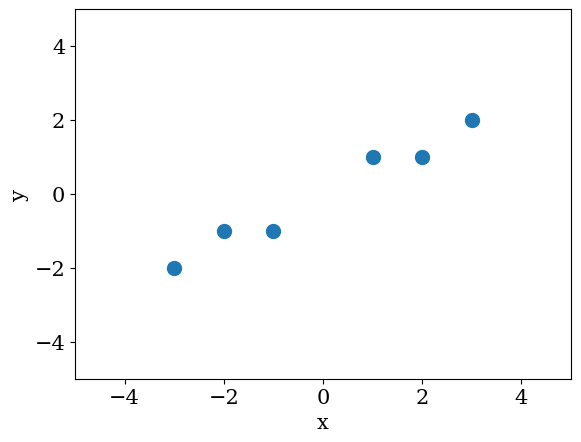

In [35]:
plt.scatter(toydata[:,0], toydata[:,1], s= 100)

# Set the labels for the x and y axes
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-5, 5])
plt.ylim([-5, 5])

## Apply PCA with one component only


In [25]:
pca_1 = PCA(n_components=1)
pca_1.fit(toydata)
pca_1.explained_variance_ratio_

array([0.99244289])

# Visualize

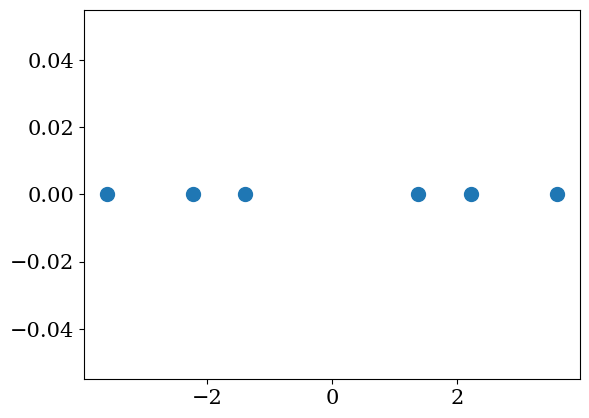

In [37]:
x_trans_1 = pca_1.transform(toydata)
x_trans_1
plt.scatter(x_trans_1, [0]*len(x_trans_1), s= 100)



# What would happen with two PC?

In [29]:
pca_2 = PCA(n_components=2)
pca_2.fit(toydata)
pca_2.explained_variance_ratio_

array([0.99244289, 0.00755711])

In [30]:
pca_2.explained_variance_ratio_[0]+ pca_2.explained_variance_ratio_[1]

1.0

(-5.0, 5.0)

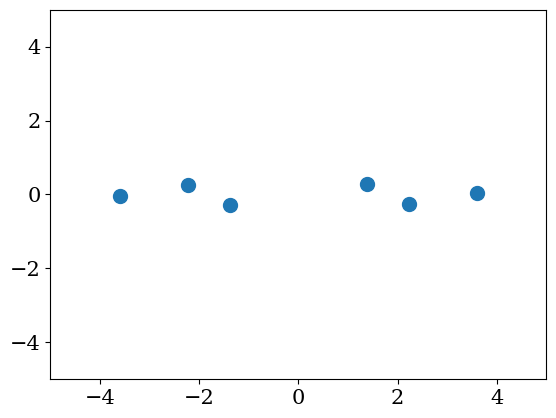

In [38]:
x_trans_2 = pca_2.transform(toydata)
plt.scatter(x_trans_2[:,0], x_trans_2[:,1], s= 100)
plt.xlim([-5, 5])
plt.ylim([-5, 5])

## What's the relationship with original plot?

# Read a real dataset

In [4]:
data = pd.read_csv("Dataset/GSE72056/Data1.csv", index_col=0)
data.dropna(inplace=True) #remove drop na
data.head()

,MMP2,BANK1,TEK,B2M,SNCA,VAT1,ARHGDIB,MFGE8,SRPX,IGSF6,...,LIME1,BATF,PDIA5,HGF,DYNC1LI2,AGTRAP,RPL10,PALM,ITGA6,C2
cy72.CD45.pos.F08.S932.comb,0.0,4.2941,0.0,10.1820,0.0000,0.0000,5.0626,0.0000,0.0000,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0000,8.0289,0.0,0.0000,0.0000
cy84_Primary_CD45_pos_H03_S471_comb,0.0,0.0000,0.0,11.0110,0.0000,0.0000,7.3478,0.0000,0.0000,0.0,...,7.1395,0.0,0.0,0.0,0.0,0.0000,8.2980,0.0,0.0000,1.5226
Cy59_56,0.0,0.0000,0.0,4.2538,2.6358,3.7239,0.0000,3.2590,0.0000,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0000,8.5804,0.0,0.0000,0.0000
cy79.p3.CD45.neg.PDL1.neg.B10.S214.comb,0.0,0.0000,0.0,10.1910,4.1745,6.5239,4.3916,7.2226,2.2981,0.0,...,0.0000,0.0,0.0,0.0,0.0,4.6172,4.8928,0.0,2.9424,0.0000
cy94_cd45pos_H11_S191_comb,0.0,0.0000,0.0,10.5700,0.0000,0.0000,6.8512,0.0000,0.0000,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0000,8.0379,0.0,0.0000,0.0000


# Check the size of dataset

In [5]:
data.shape

(3384, 2000)

So we have 3384 samples and 2000 features

# Apply PCA with two components

In [8]:

pca_2 = PCA(n_components=2)
data_2d = pca_2.fit_transform(data)

# Plot two components

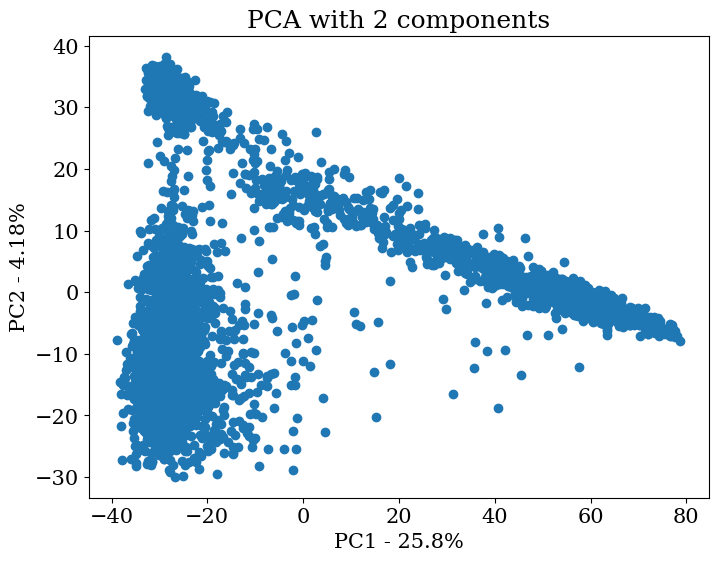

In [9]:
# Plot 2D
plt.figure(figsize=(8,6))
plt.scatter(data_2d[:,0], data_2d[:,1])
plt.title('PCA with 2 components')
plt.xlabel('PC1 - {0}%'.format(round(pca_2.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('PC2 - {0}%'.format(round(pca_2.explained_variance_ratio_[1]*100, 2)))
plt.show()


In [10]:
pca_2.explained_variance_ratio_

array([0.25799759, 0.04175993])

In [17]:
df_2d = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])
df_2d

,PC1,PC2
0,-23.504171,26.750154
1,-29.982999,-1.233878
2,5.584546,14.479312
3,64.487984,-2.014553
4,-29.389704,7.382027
...,...,...
3379,-29.134932,21.260949
3380,-24.977464,-1.127470
3381,-20.066902,-11.102039
3382,-33.522570,-21.447299


# Apply PCA with three components

In [11]:
pca_3 = PCA(n_components=3)
data_3d = pca_3.fit_transform(data)

# Plot three components

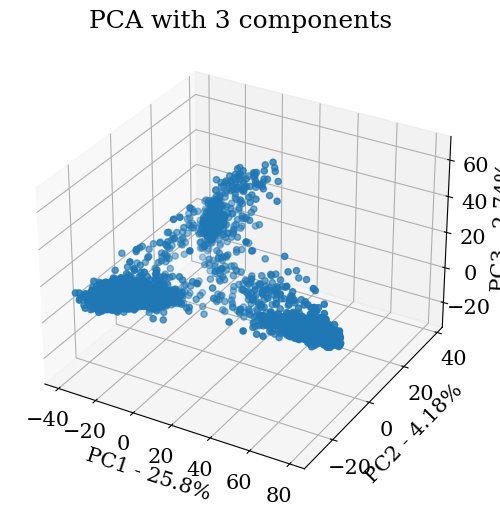

In [12]:
# Plot 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:,0], data_3d[:,1], data_3d[:,2])
ax.set_title('PCA with 3 components')
ax.set_xlabel('PC1 - {0}%'.format(round(pca_3.explained_variance_ratio_[0]*100, 2)))
ax.set_ylabel('PC2 - {0}%'.format(round(pca_3.explained_variance_ratio_[1]*100, 2)))
ax.set_zlabel('PC3 - {0}%'.format(round(pca_3.explained_variance_ratio_[2]*100, 2)))
plt.show()

# Interactive 3D Plot


In [14]:
import plotly.express as px

# Create a DataFrame for the 3D PCA result
df_3d = pd.DataFrame(data_3d, columns=['PC1', 'PC2', 'PC3'])

# Create the 3D plot
fig = px.scatter_3d(df_3d, x='PC1', y='PC2', z='PC3')

# Customize the axes labels
fig.update_layout(scene=dict(
                    xaxis=dict(range=[df_3d['PC1'].min(), df_3d['PC1'].max()]),
                    yaxis=dict(range=[df_3d['PC2'].min(), df_3d['PC2'].max()]),
                    zaxis=dict(range=[df_3d['PC3'].min(), df_3d['PC3'].max()]),
                    aspectmode='cube',
                    xaxis_title='PC1 - {0}%'.format(round(pca_3.explained_variance_ratio_[0]*100, 2)),
                    yaxis_title='PC2 - {0}%'.format(round(pca_3.explained_variance_ratio_[1]*100, 2)),
                    zaxis_title='PC3 - {0}%'.format(round(pca_3.explained_variance_ratio_[2]*100, 2))
))

fig.show()



In [18]:
df_3d

,PC1,PC2,PC3
0,-23.504171,26.750153,2.933369
1,-29.982999,-1.233877,-13.096262
2,5.584546,14.479312,-25.056049
3,64.487984,-2.014553,-3.124324
4,-29.389704,7.382029,-15.936047
...,...,...,...
3379,-29.134932,21.260950,9.140179
3380,-24.977464,-1.127470,-12.628145
3381,-20.066902,-11.102044,6.931630
3382,-33.522570,-21.447298,8.617229
